In [1]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from models.ddm import DDM, CP
from plots import redm, rejection_plot
from metrics import inversion_number, wilcoxon_test, effect_size, friedman_test_for_4_samples
from metrics import friedman_test_for_8_samples, false_alarms
from plots import heatmap, training_loss
from torchmetrics.classification import BinaryCalibrationError
import torch
from scipy import stats
import seaborn as sns

In [2]:
training_loss_0 = np.loadtxt("outputs/_training_loss_ae_model_kdd_0.csv", delimiter=",")
training_loss_1 = np.loadtxt("outputs/_training_loss_ae_model_kdd_1.csv", delimiter=",")
training_loss_2 = np.loadtxt("outputs/_training_loss_ae_model_kdd_2.csv", delimiter=",")
training_loss_3 = np.loadtxt("outputs/_training_loss_ae_model_kdd_3.csv", delimiter=",")
training_loss_4 = np.loadtxt("outputs/_training_loss_ae_model_kdd_4.csv", delimiter=",")
training_loss_mcd = np.loadtxt("outputs/_training_loss_ae_dropout_model_kdd.csv", delimiter=",")
training_loss_vae = np.loadtxt("outputs/_training_loss_vae_model_kdd.csv", delimiter=",")

In [3]:
training_loss_edl = (training_loss_0 + training_loss_1 + training_loss_2 + training_loss_3 + training_loss_4)/5

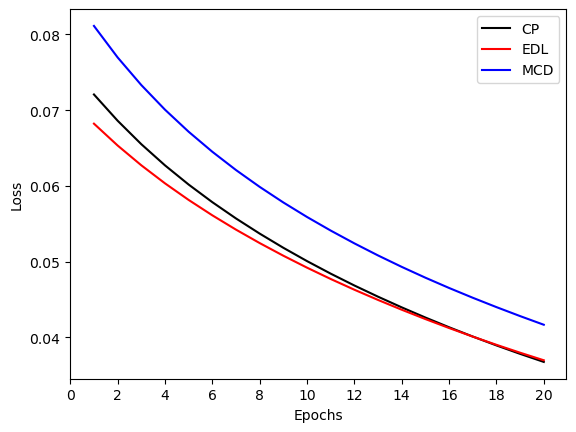

In [4]:
training_loss(training_loss_0, training_loss_edl, training_loss_mcd, training_loss_vae, dbname="kdd")

In [5]:
# edl
edl_score_0 = np.loadtxt("outputs/kdd_scores_test_ae_model_kdd_0.csv", delimiter=",")
edl_score_1 = np.loadtxt("outputs/kdd_scores_test_ae_model_kdd_1.csv", delimiter=",")
edl_score_2 = np.loadtxt("outputs/kdd_scores_test_ae_model_kdd_2.csv", delimiter=",")
edl_score_3 = np.loadtxt("outputs/kdd_scores_test_ae_model_kdd_3.csv", delimiter=",")
edl_score_4 = np.loadtxt("outputs/kdd_scores_test_ae_model_kdd_4.csv", delimiter=",")

In [6]:
# mcd
mcd_score_0 = np.loadtxt("outputs/kdd_scores_test_ae_dropout_model_kdd0.csv", delimiter=",")
mcd_score_1 = np.loadtxt("outputs/kdd_scores_test_ae_dropout_model_kdd1.csv", delimiter=",")
mcd_score_2 = np.loadtxt("outputs/kdd_scores_test_ae_dropout_model_kdd2.csv", delimiter=",")
mcd_score_3 = np.loadtxt("outputs/kdd_scores_test_ae_dropout_model_kdd3.csv", delimiter=",")
mcd_score_4 = np.loadtxt("outputs/kdd_scores_test_ae_dropout_model_kdd4.csv", delimiter=",")

In [7]:
# mcd
vae_score_0 = np.loadtxt("outputs/kdd_scores_test_vae_model_kdd0.csv", delimiter=",")
vae_score_1 = np.loadtxt("outputs/kdd_scores_test_vae_model_kdd1.csv", delimiter=",")
vae_score_2 = np.loadtxt("outputs/kdd_scores_test_vae_model_kdd2.csv", delimiter=",")
vae_score_3 = np.loadtxt("outputs/kdd_scores_test_vae_model_kdd3.csv", delimiter=",")
vae_score_4 = np.loadtxt("outputs/kdd_scores_test_vae_model_kdd4.csv", delimiter=",")

In [8]:
edl_scores = np.concatenate((edl_score_0.reshape(-1, 1), edl_score_1.reshape(-1, 1), edl_score_2.reshape(-1, 1),
                            edl_score_3.reshape(-1, 1), edl_score_4.reshape(-1, 1)), axis=1)
mcd_scores = np.concatenate((mcd_score_0.reshape(-1, 1), mcd_score_1.reshape(-1, 1), mcd_score_2.reshape(-1, 1),
                            mcd_score_3.reshape(-1, 1), mcd_score_4.reshape(-1, 1)), axis=1)
vae_scores = np.concatenate((vae_score_0.reshape(-1, 1), vae_score_1.reshape(-1, 1), vae_score_2.reshape(-1, 1),
                            vae_score_3.reshape(-1, 1), vae_score_4.reshape(-1, 1)), axis=1)

In [9]:
edl_eta_0 = np.loadtxt("outputs/kdd_threshold_ae_model_kdd_0.csv")
edl_eta_1 = np.loadtxt("outputs/kdd_threshold_ae_model_kdd_1.csv")
edl_eta_2 = np.loadtxt("outputs/kdd_threshold_ae_model_kdd_2.csv")
edl_eta_3 = np.loadtxt("outputs/kdd_threshold_ae_model_kdd_3.csv")
edl_eta_4 = np.loadtxt("outputs/kdd_threshold_ae_model_kdd_4.csv")

In [10]:
vae_eta = np.loadtxt("outputs/kdd_threshold_vae_model_kdd.csv")

In [11]:
mcd_eta = np.loadtxt("outputs/kdd_threshold_ae_dropout_model_kdd.csv")

In [12]:
XY_test = np.loadtxt("data/kdd_test.csv", delimiter=',')

In [13]:
y_test = XY_test[:, -1]

In [14]:
y_edl_pred_0 = (edl_score_0 > edl_eta_0).astype(int)
y_edl_pred_1 = (edl_score_1 > edl_eta_1).astype(int)
y_edl_pred_2 = (edl_score_2 > edl_eta_2).astype(int)
y_edl_pred_3 = (edl_score_3 > edl_eta_3).astype(int)
y_edl_pred_4 = (edl_score_4 > edl_eta_4).astype(int)
y_edl_pred = np.array([y_edl_pred_0, y_edl_pred_1, y_edl_pred_2, y_edl_pred_3, y_edl_pred_4]).T
y_edl_pred = [stats.mode(y_edl_pred[i])[0][0] for i in range(len(y_edl_pred))]
print(classification_report(y_test, y_edl_pred))
print(accuracy_score(y_test, y_edl_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.58      0.59     21589
         1.0       0.84      0.86      0.85     57156

    accuracy                           0.78     78745
   macro avg       0.72      0.72      0.72     78745
weighted avg       0.78      0.78      0.78     78745

0.7796939488221475


In [15]:
y_mcd_pred_0 = (mcd_score_0 > mcd_eta).astype(int)
y_mcd_pred_1 = (mcd_score_1 > mcd_eta).astype(int)
y_mcd_pred_2 = (mcd_score_2 > mcd_eta).astype(int)
y_mcd_pred_3 = (mcd_score_3 > mcd_eta).astype(int)
y_mcd_pred_4 = (mcd_score_4 > mcd_eta).astype(int)
y_mcd_pred = np.array([y_mcd_pred_0, y_mcd_pred_1, y_mcd_pred_2, y_mcd_pred_3, y_mcd_pred_4]).T
y_mcd_pred = [stats.mode(y_mcd_pred[i])[0][0] for i in range(len(y_mcd_pred))]
print(classification_report(y_test, y_mcd_pred))
print(accuracy_score(y_test, y_mcd_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.50      0.51     21589
         1.0       0.81      0.83      0.82     57156

    accuracy                           0.74     78745
   macro avg       0.67      0.66      0.67     78745
weighted avg       0.73      0.74      0.74     78745

0.7381040066035939


In [16]:
y_vae_pred_0 = (vae_score_0 > vae_eta).astype(int)
y_vae_pred_1 = (vae_score_1 > vae_eta).astype(int)
y_vae_pred_2 = (vae_score_2 > vae_eta).astype(int)
y_vae_pred_3 = (vae_score_3 > vae_eta).astype(int)
y_vae_pred_4 = (vae_score_4 > vae_eta).astype(int)
y_vae_pred = np.array([y_vae_pred_0, y_vae_pred_1, y_vae_pred_2, y_vae_pred_3, y_vae_pred_4]).T
y_vae_pred = [stats.mode(y_edl_pred[i])[0][0] for i in range(len(y_vae_pred))]
print(classification_report(y_test, y_vae_pred))
print(accuracy_score(y_test, y_vae_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.58      0.59     21589
         1.0       0.84      0.86      0.85     57156

    accuracy                           0.78     78745
   macro avg       0.72      0.72      0.72     78745
weighted avg       0.78      0.78      0.78     78745

0.7796939488221475


In [17]:
print(classification_report(y_test, y_edl_pred_0))
print(classification_report(y_test, y_edl_pred_1))
print(classification_report(y_test, y_edl_pred_2))
print(classification_report(y_test, y_edl_pred_3))
print(classification_report(y_test, y_edl_pred_4))
print(accuracy_score(y_test, y_edl_pred_0))
print(accuracy_score(y_test, y_edl_pred_1))
print(accuracy_score(y_test, y_edl_pred_2))
print(accuracy_score(y_test, y_edl_pred_3))
print(accuracy_score(y_test, y_edl_pred_4))

              precision    recall  f1-score   support

         0.0       0.60      0.57      0.59     21589
         1.0       0.84      0.86      0.85     57156

    accuracy                           0.78     78745
   macro avg       0.72      0.71      0.72     78745
weighted avg       0.78      0.78      0.78     78745

              precision    recall  f1-score   support

         0.0       0.60      0.57      0.58     21589
         1.0       0.84      0.85      0.85     57156

    accuracy                           0.78     78745
   macro avg       0.72      0.71      0.72     78745
weighted avg       0.77      0.78      0.78     78745

              precision    recall  f1-score   support

         0.0       0.61      0.57      0.59     21589
         1.0       0.84      0.86      0.85     57156

    accuracy                           0.78     78745
   macro avg       0.72      0.72      0.72     78745
weighted avg       0.78      0.78      0.78     78745

              preci

In [18]:
print(classification_report(y_test, y_mcd_pred_0))
print(classification_report(y_test, y_mcd_pred_1))
print(classification_report(y_test, y_mcd_pred_2))
print(classification_report(y_test, y_mcd_pred_3))
print(classification_report(y_test, y_mcd_pred_4))
print(accuracy_score(y_test, y_mcd_pred_0))
print(accuracy_score(y_test, y_mcd_pred_1))
print(accuracy_score(y_test, y_mcd_pred_2))
print(accuracy_score(y_test, y_mcd_pred_3))
print(accuracy_score(y_test, y_mcd_pred_4))

              precision    recall  f1-score   support

         0.0       0.42      0.50      0.46     21589
         1.0       0.80      0.74      0.77     57156

    accuracy                           0.68     78745
   macro avg       0.61      0.62      0.61     78745
weighted avg       0.69      0.68      0.68     78745

              precision    recall  f1-score   support

         0.0       0.43      0.51      0.46     21589
         1.0       0.80      0.74      0.77     57156

    accuracy                           0.68     78745
   macro avg       0.61      0.63      0.62     78745
weighted avg       0.70      0.68      0.69     78745

              precision    recall  f1-score   support

         0.0       0.43      0.51      0.46     21589
         1.0       0.80      0.74      0.77     57156

    accuracy                           0.68     78745
   macro avg       0.61      0.62      0.62     78745
weighted avg       0.70      0.68      0.69     78745

              preci

In [19]:
print(classification_report(y_test, y_vae_pred_0))
print(classification_report(y_test, y_vae_pred_1))
print(classification_report(y_test, y_vae_pred_2))
print(classification_report(y_test, y_vae_pred_3))
print(classification_report(y_test, y_vae_pred_4))
print(accuracy_score(y_test, y_vae_pred_0))
print(accuracy_score(y_test, y_vae_pred_1))
print(accuracy_score(y_test, y_vae_pred_2))
print(accuracy_score(y_test, y_vae_pred_3))
print(accuracy_score(y_test, y_vae_pred_4))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     21589
         1.0       0.94      0.94      0.94     57156

    accuracy                           0.91     78745
   macro avg       0.89      0.89      0.89     78745
weighted avg       0.91      0.91      0.91     78745

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     21589
         1.0       0.94      0.94      0.94     57156

    accuracy                           0.91     78745
   macro avg       0.89      0.89      0.89     78745
weighted avg       0.91      0.91      0.91     78745

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     21589
         1.0       0.94      0.94      0.94     57156

    accuracy                           0.91     78745
   macro avg       0.89      0.89      0.89     78745
weighted avg       0.91      0.91      0.91     78745

              preci

In [20]:
edl_eta = (edl_eta_0 + edl_eta_1 + edl_eta_2 + edl_eta_3 + edl_eta_4)/5

In [21]:
edl_mean_scores = np.mean(edl_scores, axis=1)
edl_std_scores = np.std(edl_scores, axis=1)

In [22]:
index_n = edl_mean_scores < edl_eta
index_a = edl_mean_scores >= edl_eta
edl_normal_scores = edl_mean_scores[index_n]

In [23]:
d, phi = 0.3, 0.4
index = "_1"

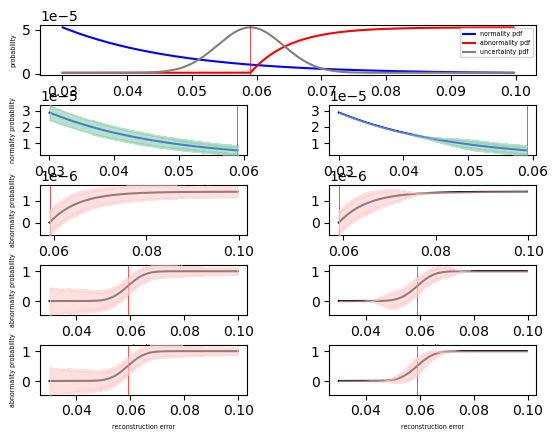

In [24]:
ddm_edl = DDM(edl_scores, y_test, edl_eta, d=d, phi=phi)
normal_edl, abnormal_edl = ddm_edl.distribution_segments()
redm(ddm_edl.params, "edl_distribution_kdd"+index, scale_n =0.0005, scale_a = 0.0001)

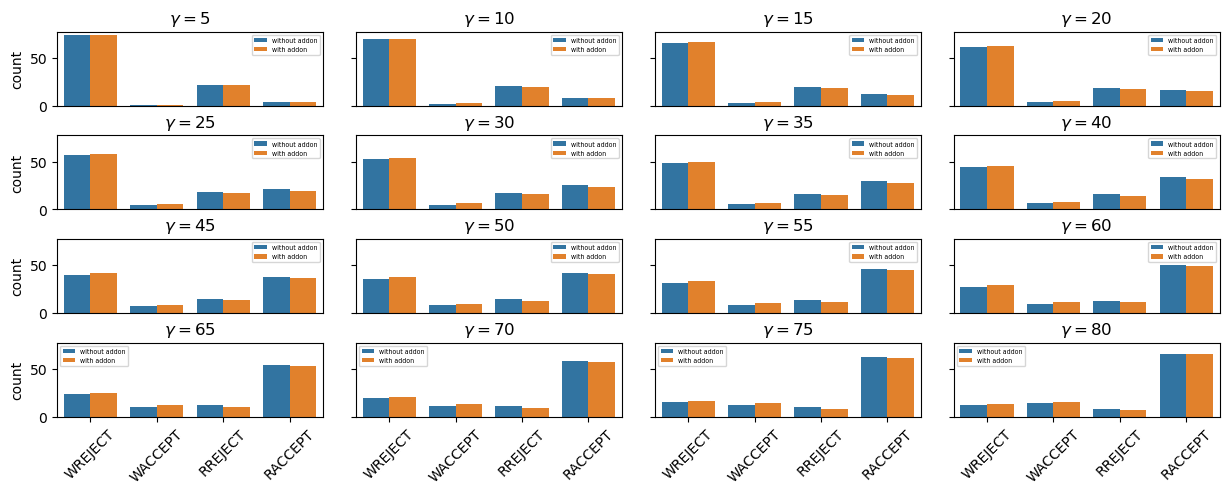

In [25]:
E_normal, S_normal, S_n, p_normal, _, y_n_index = ddm_edl.params.normal
E_abnormal, S_abnormal, S_a, p_abnormal, _, y_a_index = ddm_edl.params.abnormal
S = np.concatenate((S_normal, S_abnormal))
S_p = np.concatenate((S_n, S_a))
y_i = np.concatenate((y_n_index, y_a_index)).astype(int).tolist()
q = 40
dec = 4
rejection = false_alarms(S, S_p, y_edl_pred, y_i, y_test, q=q, dec = dec)
rejection_plot(S, S_p, y_edl_pred_0, y_i, y_test, "edl_distribution_kdd"+index)

In [26]:
metric = BinaryCalibrationError(n_bins=2, norm='l2')
edl_sorted_scores = np.concatenate((normal_edl[1], abnormal_edl[1]))
edl_sorted_scores_p = np.concatenate((normal_edl[2], abnormal_edl[2]))
edl_confidence = edl_sorted_scores/(2*edl_eta)
edl_confidence_p = edl_sorted_scores_p/(2*edl_eta)
#conf_0_p, conf_1_p = 1 - edl_sorted_scores_p/(2*edl_eta), edl_sorted_scores_p/(2*edl_eta)
edl_confidence = torch.tensor(np.concatenate((normal_edl[1], abnormal_edl[1])))
#edl_confidence = np.concatenate((conf_0, conf_1))
#edl_confidence_p = np.concatenate((conf_0_p, conf_1_p))
edl_target = torch.tensor(np.concatenate((normal_edl[-2], abnormal_edl[-2])))
edl_confidence_p = torch.tensor(np.concatenate((normal_edl[2], abnormal_edl[2])))
print("edl = ", metric(torch.tensor(edl_confidence), edl_target))
print("edl+ = ", metric(torch.tensor(edl_confidence_p), edl_target))

edl =  tensor(0.7210, dtype=torch.float64)
edl+ =  tensor(0.7217, dtype=torch.float64)


/tmp/ipykernel_27035/3227036305.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print("edl = ", metric(torch.tensor(edl_confidence), edl_target))
/tmp/ipykernel_27035/3227036305.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print("edl+ = ", metric(torch.tensor(edl_confidence_p), edl_target))


In [27]:
wilcoxon_test(edl_confidence, edl_confidence_p)

0.0

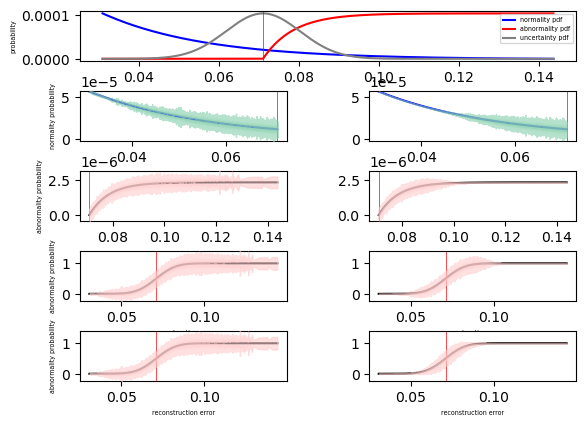

In [28]:
ddm_mcd = DDM(mcd_scores, y_test, mcd_eta, d=d, phi=phi)
normal_mcd, abnormal_mcd = ddm_mcd.distribution_segments()
redm(ddm_mcd.params, "mcd_distribution_kdd"+index, scale_n =0.0005, scale_a = 0.00002)

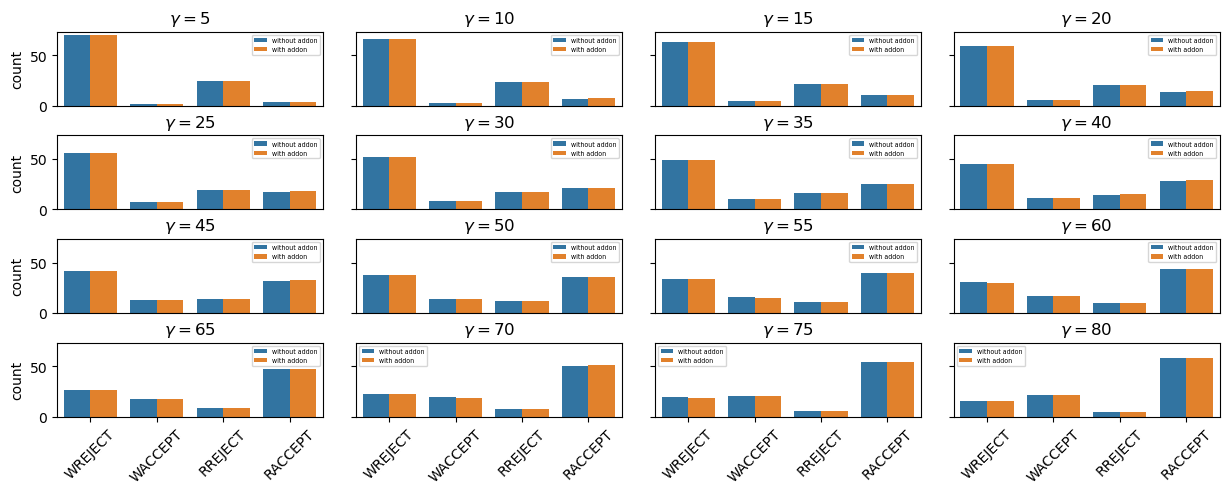

In [29]:
E_normal, S_normal, S_n, p_normal, _, y_n_index = ddm_mcd.params.normal
E_abnormal, S_abnormal, S_a, p_abnormal, _, y_a_index = ddm_mcd.params.abnormal
S = np.concatenate((S_normal, S_abnormal))
S_p = np.concatenate((S_n, S_a))
y_i = np.concatenate((y_n_index, y_a_index)).astype(int).tolist()
q = 40
dec = 4
rejection = false_alarms(S, S_p, y_mcd_pred, y_i, y_test, q=q, dec = dec)
rejection_plot(S, S_p, y_mcd_pred, y_i, y_test, "mcd_distribution_kdd"+index)

In [30]:
mcd_confidence = torch.tensor(np.concatenate((normal_mcd[1], abnormal_mcd[1])))
mcd_target = torch.tensor(np.concatenate((normal_mcd[-2], abnormal_mcd[-2])))
mcd_confidence_p = torch.tensor(np.concatenate((normal_mcd[2], abnormal_mcd[2])))
print("mcd = ", metric(mcd_confidence, mcd_target))
print("mcd+ = ", metric(mcd_confidence_p, mcd_target))

mcd =  tensor(0.7155, dtype=torch.float64)
mcd+ =  tensor(0.7177, dtype=torch.float64)


In [31]:
wilcoxon_test(mcd_confidence, mcd_confidence_p)

0.0

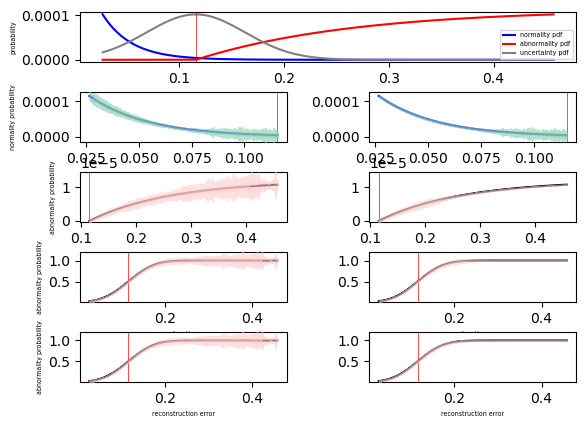

In [32]:
ddm_vae = DDM(vae_scores, y_test, vae_eta, d=d, phi=phi)
normal_vae, abnormal_vae = ddm_vae.distribution_segments()
redm(ddm_vae.params, "vae_distribution_kdd"+index, scale_n =0.005, scale_a = 0.0001, s=50000)

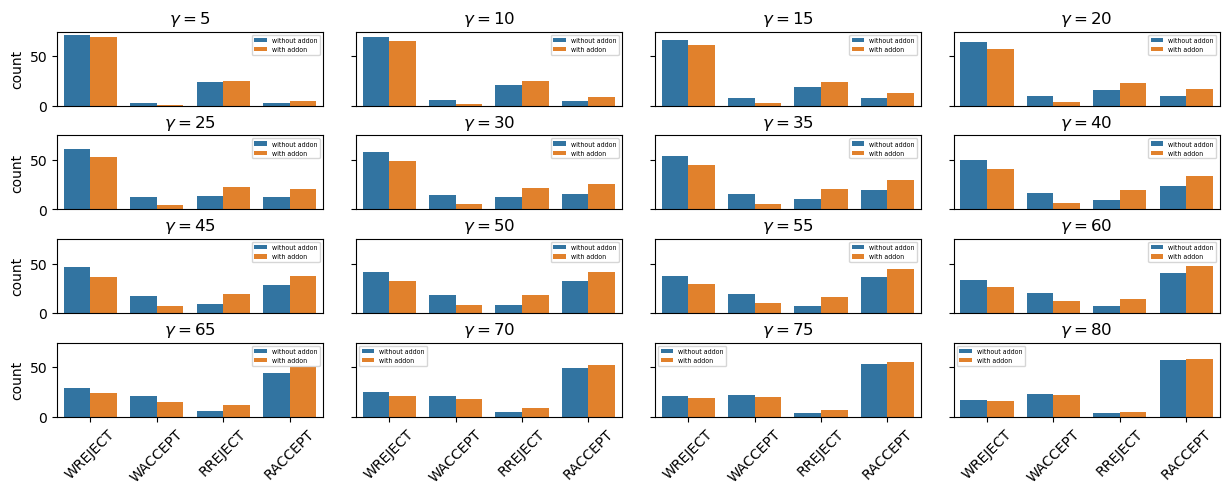

In [33]:
E_normal, S_normal, S_n, p_normal, _, y_n_index = ddm_vae.params.normal
E_abnormal, S_abnormal, S_a, p_abnormal, _, y_a_index = ddm_vae.params.abnormal
S = np.concatenate((S_normal, S_abnormal))
S_p = np.concatenate((S_n, S_a))
y_i = np.concatenate((y_n_index, y_a_index)).astype(int).tolist()
q = 40
dec = 4
rejection = false_alarms(S, S_p, y_vae_pred, y_i, y_test, q=q, dec = dec)
rejection_plot(S, S_p, y_mcd_pred, y_i, y_test, "vae_distribution_kdd"+index)

In [34]:
vae_confidence = torch.tensor(np.concatenate((normal_vae[1], abnormal_vae[1])))
vae_target = torch.tensor(np.concatenate((normal_vae[-2], abnormal_vae[-2])))
vae_confidence_p = torch.tensor(np.concatenate((normal_vae[2], abnormal_vae[2])))
print("vae = ", metric(vae_confidence, vae_target))
print("vae+ = ", metric(vae_confidence_p, vae_target))

vae =  tensor(0.7208, dtype=torch.float64)
vae+ =  tensor(0.7253, dtype=torch.float64)


In [35]:
wilcoxon_test(vae_confidence, vae_confidence_p)

0.0

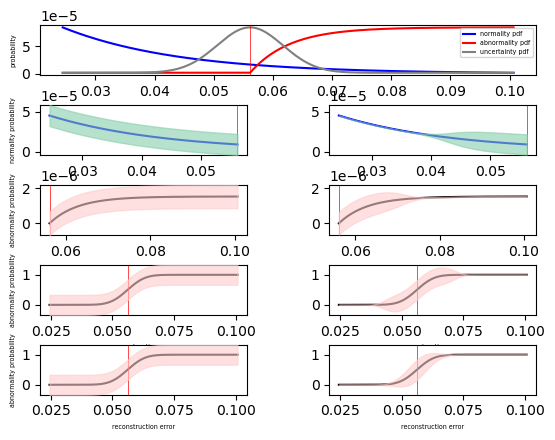

In [36]:
ddm_cp = DDM(edl_score_0, y_test, edl_eta_0, d=d, phi=phi)
normal_cp, abnormal_cp = ddm_cp.distribution_segments(True)
redm(ddm_cp.params, "cp_distribution_kdd"+index, scale_n =0.0002, scale_a = 0.00001)

In [37]:
cp_confidence = torch.tensor(np.concatenate((normal_cp[1], abnormal_cp[1])))
cp_target = torch.tensor(np.concatenate((normal_cp[-2], abnormal_cp[-2])))
cp_confidence_p = torch.tensor(np.concatenate((normal_cp[2], abnormal_cp[2])))
print("cp = ", metric(cp_confidence, cp_target))
print("cp+ = ", metric(cp_confidence_p, cp_target))

cp =  tensor(0.6597, dtype=torch.float64)
cp+ =  tensor(0.6718, dtype=torch.float64)


In [38]:
wilcoxon_test(cp_confidence, cp_confidence_p)

0.0

In [39]:

conf = np.concatenate((edl_confidence.detach().cpu().numpy().reshape(-1, 1),
                              mcd_confidence.detach().cpu().numpy().reshape(-1, 1),
                              vae_confidence.detach().cpu().numpy().reshape(-1, 1),
                              cp_confidence.detach().cpu().numpy().reshape(-1, 1),
                              edl_confidence_p.detach().cpu().numpy().reshape(-1, 1),
                              mcd_confidence_p.detach().cpu().numpy().reshape(-1, 1),
                              vae_confidence_p.detach().cpu().numpy().reshape(-1, 1),
                              cp_confidence_p.detach().cpu().numpy().reshape(-1, 1)), axis=1)

In [40]:
friedman_test_for_4_samples(conf[:, 0], conf[:, 1], conf[:, 2], conf[:, 3])

0.0

In [41]:
friedman_test_for_4_samples(conf[:, 4], conf[:, 5], conf[:, 6], conf[:, 7])

0.0

In [42]:
friedman_test_for_8_samples(conf[:, 0], conf[:, 1], conf[:, 3], conf[:, 4],
                           conf[:, 4], conf[:, 5], conf[:, 6], conf[:, 7])

0.0

In [43]:
effect_sizes = np.zeros((8, 8))
for i in range(8):
    for j in range(8):
        if i!=j:
            s = np.concatenate((conf[:, i].reshape(-1, 1), conf[:, j].reshape(-1, 1)), axis=1)
            effect_sizes[i, j] = effect_size(s)

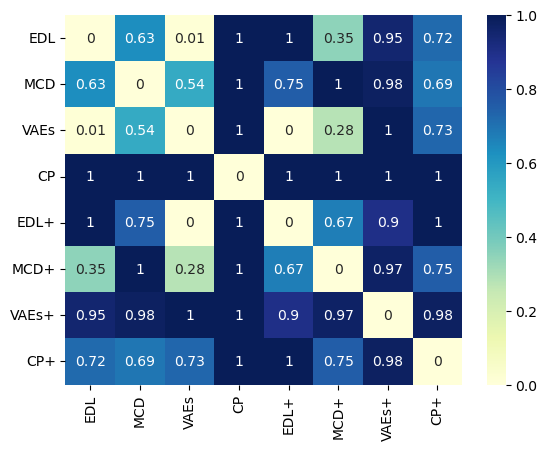

In [44]:
heatmap(effect_sizes, "kdd_heatmap")

In [45]:
in_edl = inversion_number(normal_edl[0], normal_edl[1], abnormal_edl[0], abnormal_edl[1], edl_eta)
in_edl_plus = inversion_number(normal_edl[0], normal_edl[2], abnormal_edl[0], abnormal_edl[2], edl_eta)
in_edl, in_edl_plus

((0.7785275498298121, 0.1837615850124144, 0.4811445674211132),
 (0.2979135999814421, 0.14875818369488403, 0.22333589183816308))

In [ ]:
in_mcd = inversion_number(normal_mcd[0], normal_mcd[1], abnormal_mcd[0], abnormal_mcd[1], mcd_eta)
in_mcd_plus = inversion_number(normal_mcd[0], normal_mcd[2], abnormal_mcd[0], abnormal_mcd[2], mcd_eta)
in_mcd, in_mcd_plus

In [ ]:
in_vae = inversion_number(normal_vae[0], normal_vae[1], abnormal_vae[0], abnormal_vae[1], vae_eta)
in_vae_plus = inversion_number(normal_vae[0], normal_vae[2], abnormal_vae[0], abnormal_vae[2], vae_eta)
in_vae, in_vae_plus

In [ ]:
in_cp = inversion_number(normal_cp[0], normal_cp[1], abnormal_cp[0], abnormal_cp[1], edl_eta_0)
in_cp_plus = inversion_number(normal_cp[0], normal_cp[2], abnormal_cp[0], abnormal_cp[2], edl_eta_0)
in_cp, in_cp_plus